In [2]:
from IPython.display import clear_output
import sys, os
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import integrate

from spectrum import *

# Comparing Primakoff axion emission spectrum from different simluations

In [3]:
# loading digitized data for the Garching model from figure 2
hotSN = np.loadtxt('hotSN.csv', delimiter=',', unpack=True) # SFHo-20.0
coldSN = np.loadtxt('coldSN.csv', delimiter=',', unpack=True) # SFHo-18.8

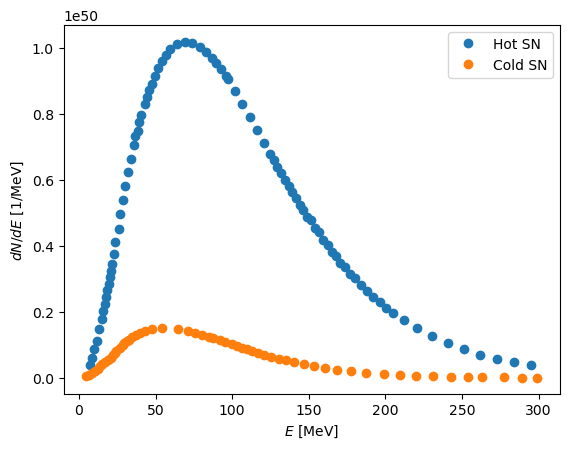

In [5]:
plt.plot(hotSN[0], hotSN[1], 'o', label='Hot SN')
plt.plot(coldSN[0], coldSN[1], 'o', label='Cold SN')
plt.xlabel("$E$ [MeV]")
plt.ylabel("$dN/dE$ [1/MeV]")
plt.legend(loc=1)

To compare the axion emission spectra from a supernova of SFHo-18.8 to the cold SN model, we integrate the spectrum of dN/dE/dt, in units of num. of axions / GeV / s, over 0 - 10s.

In [6]:
time_bins = load_time("Primakoff_Spectra/Spectra_Primakoff_18p8/")
E_bins, prim_spec = load_prim("Primakoff_Spectra/Spectra_Primakoff_18p8/", Eoutput = True) # E_bins in units of GeV, prim_spec in units of 1/GeV with gagg=1 1/GeV

prim_spec = load_prim("Primakoff_Spectra/Spectra_Primakoff_18p8/")
prim_1GeV = np.zeros(len(E_bins))

for i in range(len(prim_1GeV)):
    spec_as_time = interp.interp1d(time_bins, prim_spec[:,i], fill_value=0, bounds_error=False)
    prim_1GeV[i] = integrate.quad(spec_as_time, 0, 10)[0]
    
    print("Ebin: %d"%i)
clear_output()

Text(0.1, 0.05, '$g_{a\\gamma\\gamma} = 10^{-11}$ GeV$^{-1}$')

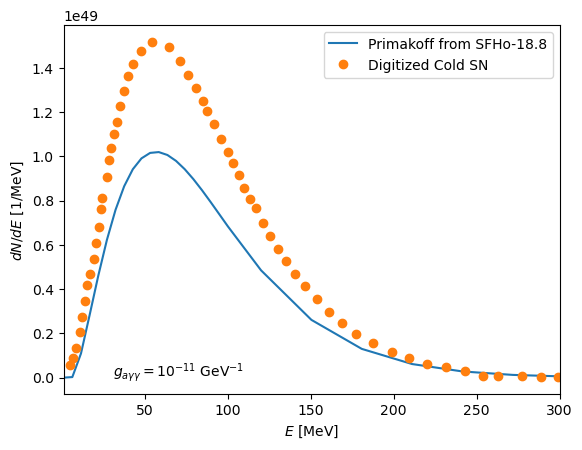

In [7]:
plt.plot(E_bins * 1e3, prim_1GeV / 1e3 * (1e-11)**2, label='Primakoff from SFHo-18.8') # rescaling energy from GeV to MeV
plt.plot(coldSN[0], coldSN[1], 'o', label='Digitized Cold SN')
plt.xlim(1,300)
plt.ylabel('$dN/dE$ [1/MeV]')
plt.xlabel('$E$ [MeV]')
plt.legend(loc=1)
plt.text(0.1, 0.05, '$g_{a\\gamma\\gamma} = 10^{-11}$ GeV$^{-1}$', transform=plt.gca().transAxes, horizontalalignment='left')

In [9]:
np.amax(coldSN[1]) / np.amax(prim_1GeV / 1e3 * (1e-11)**2)

1.4896182497052217

For the same simluation of SFHo-18.8, the peak of the spectrum are off by a factor of ~1.5

We also check the difference between SFHo-20.0 simluation and the digitized hot model for SN.

In [11]:
time_bins = load_time("Primakoff_Spectra/Spectra_Primakoff_20p0/")
E_bins, prim_spec = load_prim("Primakoff_Spectra/Spectra_Primakoff_20p0/", Eoutput = True) # E_bins in units of GeV, prim_spec in units of 1/GeV with gagg=1 1/GeV

prim_spec = load_prim("Primakoff_Spectra/Spectra_Primakoff_20p0/")
prim_1GeV = np.zeros(len(E_bins))

for i in range(len(prim_1GeV)):
    spec_as_time = interp.interp1d(time_bins, prim_spec[:,i], fill_value=0, bounds_error=False)
    prim_1GeV[i] = integrate.quad(spec_as_time, 0, 10)[0]
    
    print("Ebin: %d"%i)
clear_output()

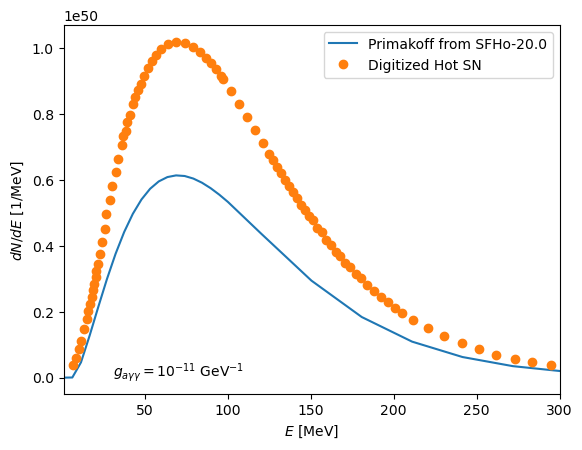

In [12]:
plt.plot(E_bins * 1e3, prim_1GeV / 1e3 * (1e-11)**2, label='Primakoff from SFHo-20.0')
plt.plot(hotSN[0], hotSN[1], 'o', label='Digitized Hot SN')
plt.xlim(1,300)
plt.ylabel('$dN/dE$ [1/MeV]')
plt.xlabel('$E$ [MeV]')
plt.text(0.1, 0.05, '$g_{a\\gamma\\gamma} = 10^{-11}$ GeV$^{-1}$', transform=plt.gca().transAxes, horizontalalignment='left')
plt.legend(loc=1)

In [13]:
np.amax(hotSN[1]) / np.amax(prim_1GeV / 1e3 * (1e-11)**2)

1.661343864167631

Similar to the previous comparison, the peak of the axion emission for the hot SN model is greater than the spectrum used in 2405.19393 by a factor of ~1.6